## 1. Data Loading

We begin by importing the dataset from the `data/raw/` folder. This file contains weekly sales data for Walmart stores, along with economic and environmental indicators. We also ensure the working directory is correctly set to the project root.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import csv

cwd= os.getcwd()
if cwd.endswith("notebooks"):
  os.chdir("..")
print("working directory set to :",os.getcwd())
# load data-set
file_path="data/raw/Walmart Data Analysis and Forcasting.csv"
df = pd.read_csv(file_path)
df=pd.read_csv(file_path)
# quick review
print("shape:", df.shape)
df.head()

working directory set to : c:\Users\Emron nabizadeh\Documents\Data-analyst\Project\walmart-sales-forecasting
shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 2. Column Cleaning

To simplify analysis, we standardize column names by stripping whitespace, converting to lowercase, and replacing spaces with underscores.


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())




['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment']


In [5]:
df['store'], df['date'], df['weekly_sales'], df['holiday_flag'], ...


(0        1
 1        1
 2        1
 3        1
 4        1
         ..
 6430    45
 6431    45
 6432    45
 6433    45
 6434    45
 Name: store, Length: 6435, dtype: int64,
 0       05-02-2010
 1       12-02-2010
 2       19-02-2010
 3       26-02-2010
 4       05-03-2010
            ...    
 6430    28-09-2012
 6431    05-10-2012
 6432    12-10-2012
 6433    19-10-2012
 6434    26-10-2012
 Name: date, Length: 6435, dtype: object,
 0       1643690.90
 1       1641957.44
 2       1611968.17
 3       1409727.59
 4       1554806.68
            ...    
 6430     713173.95
 6431     733455.07
 6432     734464.36
 6433     718125.53
 6434     760281.43
 Name: weekly_sales, Length: 6435, dtype: float64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6430    0
 6431    0
 6432    0
 6433    0
 6434    0
 Name: holiday_flag, Length: 6435, dtype: int64,
 Ellipsis)

## 3. Data Inspection

We inspect the dataset to understand its structure, check for missing values, and review basic statistics. This helps identify potential cleaning steps and modeling challenges.


In [6]:
# Basic info
df.info()

# Summary stats
df.describe()

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

## 4. Weekly Sales Distribution

We plot the distribution of weekly sales to understand its spread, skewness, and detect any outliers. This is useful for modeling and feature engineering.


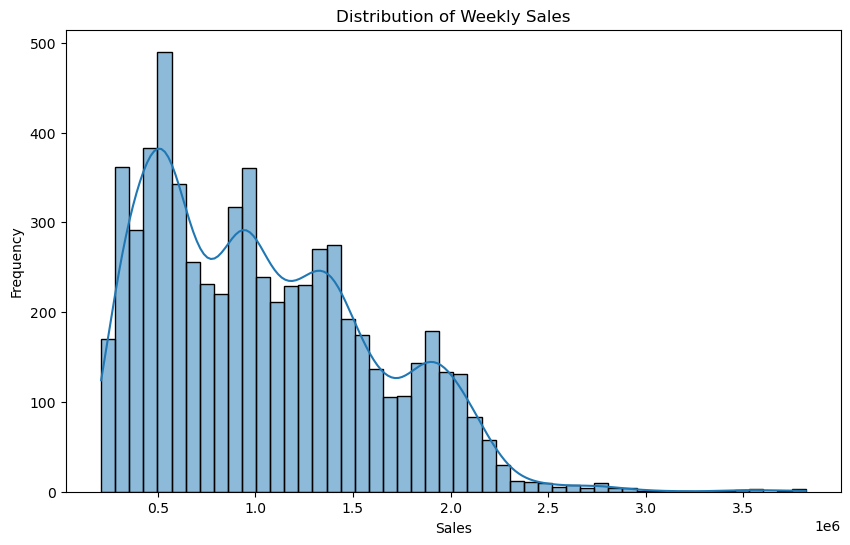

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['weekly_sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


## 5. Date Range and Holiday Impact

We explore the time span of the dataset and analyze how holidays may affect weekly sales. This insight will be valuable for time series forecasting.


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print("Date range:", df['date'].min(), "to", df['date'].max())
print("Holiday breakdown:\n", df['holiday_flag'].value_counts())


Date range: 2010-01-10 00:00:00 to 2012-12-10 00:00:00
Holiday breakdown:
 holiday_flag
0    5985
1     450
Name: count, dtype: int64


## 6. Time Series Preview

We aggregate weekly sales over time to visualize trends and seasonality. This sets the stage for building forecasting models in later phases.


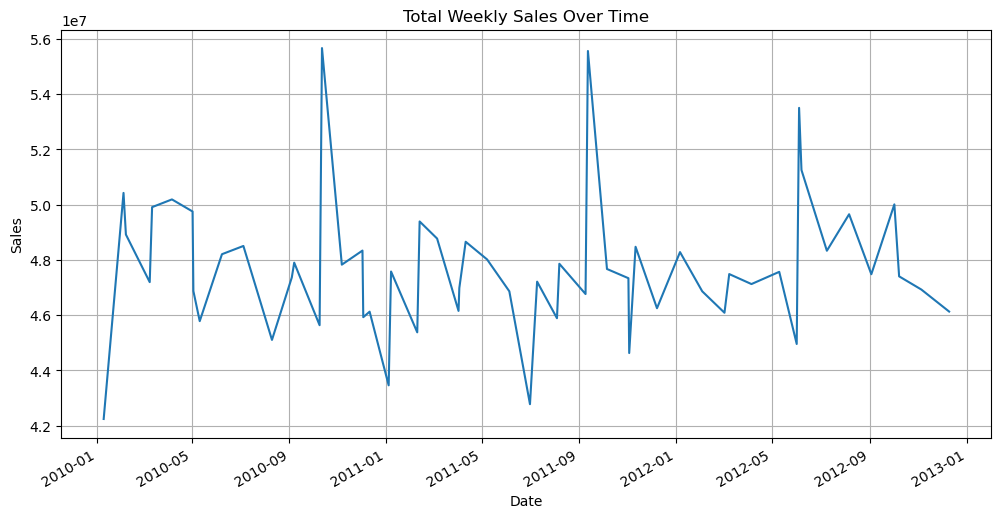

In [9]:
sales_by_date = df.groupby('date')['weekly_sales'].sum()

plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
